# => Select k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)### Cho dữ liệu data.csv. Hãy thực hiện bài toán phân cụm cho dữ liệu.
1. Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần)
2. Trực quan hóa dữ liệu
3. Áp dụng Elbow tìm k
4. Áp dụng thuật toán K-Means để giải bài toán phân cụm theo K
5. Trực quan hóa kết quả, nhận xét

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv("../../Data/data.csv", index_col=0)
df.head(3)

,f1,f2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962


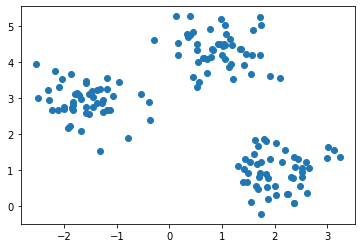

In [3]:
plt.scatter(df.f1,df.f2)

c:\programdata\anaconda3\envs\ai_ocr\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "
c:\programdata\anaconda3\envs\ai_ocr\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


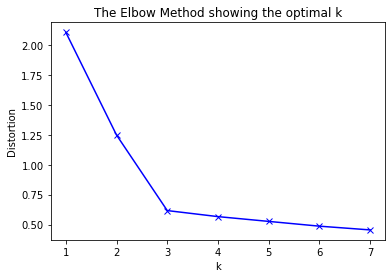

In [4]:
# k means determine k
distortions = []
K = range(1,8)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [5]:
# => Select k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[ 0.9329651   4.35420712]
 [-1.5947298   2.92236966]
 [ 2.06521743  0.96137409]]
[2 0 0 0 2 0 0 2 1 0 2 1 1 0 0 1 1 2 1 2 0 2 0 0 1 2 2 0 1 2 1 1 1 1 0 2 2
 2 0 0 1 1 0 2 2 2 1 0 1 0 2 0 0 2 2 1 0 2 1 0 1 1 1 1 0 1 0 2 0 0 0 2 2 0
 2 0 0 1 1 0 2 2 0 0 2 2 2 1 1 2 2 0 2 0 2 0 1 1 2 2 2 2 1 2 2 0 1 0 0 0 1
 0 2 1 0 1 0 0 1 1 0 2 0 0 2 2 1 2 1 1 1 1 2 1 1 1 0 1 2 1 0 0 2 2 1 1 1 1
 2 2]


In [6]:
df['Group'] = pd.Series(labels)
df.head()

,f1,f2,Group
0,2.605097,1.225296,2
1,0.532377,3.313389,0
2,0.802314,4.381962,0
3,0.528537,4.497239,0
4,2.618585,0.357698,2


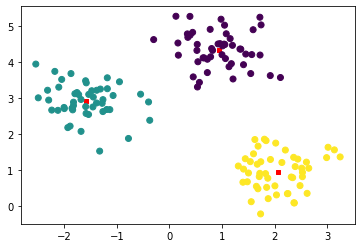

In [7]:
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "s", s=15, color='red')
plt.scatter(df.f1, df.f2, c=df.Group)
plt.show()